In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
crime=pd.read_csv("crime_data.csv")

In [4]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime2=crime.drop(['Unnamed: 0'],axis=1)

In [6]:
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)                     

In [10]:
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [11]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)

D:\Farhat\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


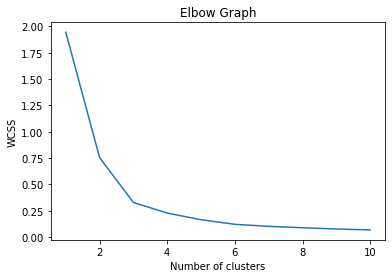

In [12]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(crime2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [15]:
clusters4.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3])

In [16]:
crime3=crime2.copy()
crime3['clusters4id']=clusters4.labels_
crime3

,Murder,Assault,UrbanPop,Rape,clusters4id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [17]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

In [18]:
# Group data by Clusters (K=4)
crime3.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


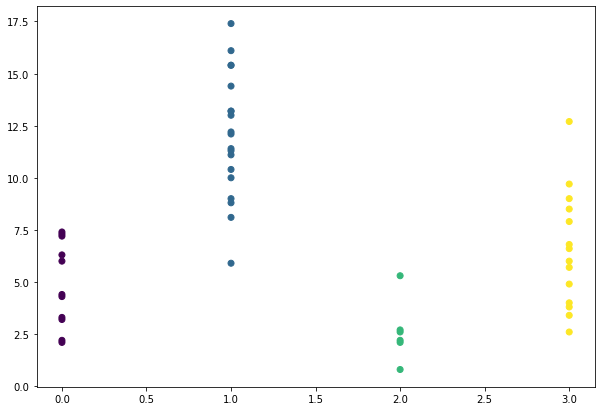

In [19]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clusters4id'],crime3['Murder'], c=clusters4.labels_) 

In [20]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(crime2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [21]:
clusters5.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 4, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3])

In [22]:
crime4=crime3.copy()
crime4['clusters5id']=clusters5.labels_
crime4

,Murder,Assault,UrbanPop,Rape,clusters4id,clusters5id
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,1,1
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,3,3
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,1,1
9,17.4,211,60,25.8,1,1


In [23]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.0247473 , 0.69224362, 0.70739404, 0.13009016],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277]])

In [25]:
crime4.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Murder,Assault,UrbanPop,Rape,clusters4id
,,mean,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545,0
1,1,12.021053,260.526316,66.421053,27.694737,1
2,2,2.080000,56.600000,57.800000,10.760000,2
3,3,6.542857,145.285714,63.500000,20.107143,3
4,4,5.300000,46.000000,83.000000,20.200000,2


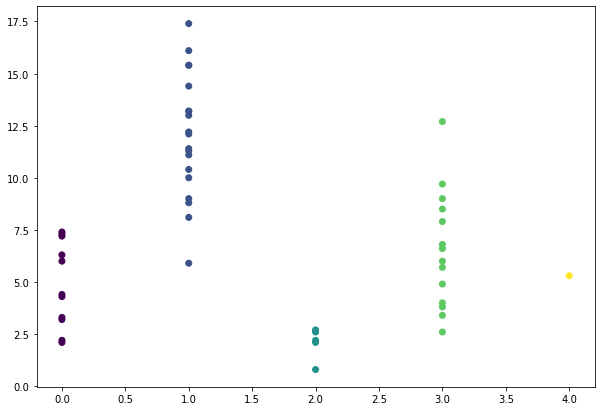

In [27]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime4['clusters5id'],crime4['Murder'], c=clusters5.labels_)